In [2]:
from pickle import dump, load
from tqdm.notebook import tqdm
from skimage import feature
import cv2, os, dlib, imutils
from imutils import face_utils
import numpy as np
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt


In [5]:
if not os.path.isfile('yz4v8tb3tp-1.zip'):
    !wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/yz4v8tb3tp-1.zip
    !unzip yz4v8tb3tp-1.zip
else:
    print('Dataset text already downloaded')

Dataset text already downloaded


In [9]:
if not os.path.isfile('lfwcrop_grey.zip'):
    !wget https://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip -q lfwcrop_grey.zip
else:
    print('Dataset images already downloaded')

Dataset images already downloaded


In [3]:
if not os.path.isfile('shape_predictor_68_face_landmarks.dat'):
    !wget https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
else:
    print('Dlib\'s shape predictor already downloaded')

Dlib's shape predictor already downloaded


In [2]:
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [36]:
with open('SMILE_list.txt', 'r') as smileTxt:
    smiles = smileTxt.read()
with open('NON-SMILE_list.txt', 'r') as notsmileTxt:
    notsmiles = notsmileTxt.read()

X, Y = [], []

for name in tqdm(smiles.split('\n')):
    if name == '': continue
    if name[-3:] != 'jpg': continue
    classe = 'smile'
    imgpath = os.path.join('lfwcrop_grey/faces/', name.replace('jpg', 'pgm'))
    img_smile = cv2.imread(imgpath)
    h, w = img.shape[:2]
    # frame = imutils.resize(img, width=128)
    gray = cv2.cvtColor(img_smile, cv2.COLOR_BGR2GRAY)
    fd , vis_smile = feature.hog(img_smile, orientations=8, pixels_per_cell=(8, 8),
                cells_per_block=(1, 1), visualize=True, feature_vector=True)
    rect = dlib.rectangle(left=0, top=0, right=w, bottom=h)
    shape = predictor(gray, rect)
    shape_smile = face_utils.shape_to_np(shape)
    # print(shape.shape, fd.shape)
    # break
    X.append(np.concatenate([fd, shape_smile.flatten()]))
    Y.append(classe)
for name in tqdm(notsmiles.split('\n')):
    if name == '': continue
    if name[-3:] != 'jpg': continue
    classe = 'notsmile'
    imgpath = os.path.join('lfwcrop_grey/faces/', name.replace('jpg', 'pgm'))
    img_notsmile = cv2.imread(imgpath)
    h, w = img.shape[:2]
    # frame = imutils.resize(img, width=128)
    gray = cv2.cvtColor(img_notsmile, cv2.COLOR_BGR2GRAY)
    fd , vis_notsmile = feature.hog(img_notsmile, orientations=8, pixels_per_cell=(8, 8),
                cells_per_block=(1, 1), visualize=True, feature_vector=True)
    rect = dlib.rectangle(left=0, top=0, right=w, bottom=h)
    shape = predictor(gray, rect)
    shape_notsmile = face_utils.shape_to_np(shape)
    # print(shape.shape, fd.shape)
    # break
    X.append(np.concatenate([fd, shape_notsmile.flatten()]))
    Y.append(classe)
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

  0%|          | 0/603 [00:00<?, ?it/s]

  0%|          | 0/601 [00:00<?, ?it/s]

(1200, 648) (1200,)


In [16]:
for i in tqdm(range(1,101)):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    feat_path_train = f'SMILEsmilesD_balanced_features/train_features_HOGShape_{i}.pkl'
    labels_path_train = f'SMILEsmilesD_balanced_features/train_labels_HOGShape_{i}.pkl'
    feat_path_test = f'SMILEsmilesD_balanced_features/test_features_HOGShape_{i}.pkl'
    labels_path_test = f'SMILEsmilesD_balanced_features/test_labels_HOGShape_{i}.pkl'
    dump(X_train, open(feat_path_train, 'wb'))
    dump(y_train, open(labels_path_train, 'wb'))
    dump(X_test, open(feat_path_test, 'wb'))
    dump(y_test, open(labels_path_test, 'wb'))

  0%|          | 0/100 [00:00<?, ?it/s]

### Checking that feed works

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3, random_state=100)

In [18]:
(X_train == X_train2).all()

True

In [76]:
X.shape

(1200, 648)

In [99]:
import pandas as pd

In [124]:
feats = pd.DataFrame(X)
labels = pd.DataFrame(Y)

In [130]:
featslabels = pd.concat([feats, labels], axis=1, ignore_index=True)
featslabels

,0,1,2,3,4,5,6,7,8,9,...,639,640,641,642,643,644,645,646,647,648
0,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.104653,0.098450,...,48.0,45.0,47.0,37.0,50.0,33.0,51.0,30.0,50.0,smile
1,0.420303,0.420303,0.410624,0.137603,0.420303,0.060079,0.319728,0.420303,0.490249,0.490249,...,47.0,50.0,46.0,39.0,47.0,35.0,49.0,30.0,49.0,smile
2,0.408612,0.265078,0.159990,0.263286,0.408612,0.408612,0.408612,0.408612,0.456930,0.456930,...,45.0,46.0,47.0,37.0,50.0,33.0,50.0,28.0,49.0,smile
3,0.391512,0.391512,0.391512,0.391512,0.391512,0.072109,0.274066,0.391512,0.447818,0.145835,...,46.0,49.0,48.0,40.0,51.0,35.0,52.0,30.0,51.0,smile
4,0.409474,0.000000,0.326322,0.409474,0.409474,0.409474,0.409474,0.234877,0.417017,0.294657,...,43.0,48.0,45.0,43.0,47.0,39.0,48.0,35.0,48.0,smile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.502574,0.502574,0.502574,0.191199,0.439982,0.106278,0.009737,0.026952,0.484757,0.183713,...,52.0,44.0,51.0,37.0,51.0,33.0,52.0,28.0,51.0,notsmile
1196,0.333393,0.294520,0.581513,0.424163,0.369072,0.295158,0.222089,0.106673,0.158618,0.103495,...,47.0,44.0,49.0,38.0,49.0,35.0,49.0,31.0,49.0,notsmile
1197,0.455375,0.455375,0.252769,0.000000,0.277863,0.171569,0.455375,0.455375,0.213583,0.311062,...,53.0,44.0,52.0,38.0,51.0,36.0,52.0,32.0,52.0,notsmile
1198,0.386656,0.386656,0.386656,0.386656,0.386656,0.139369,0.386656,0.289063,0.298037,0.432873,...,49.0,39.0,50.0,30.0,50.0,26.0,50.0,23.0,49.0,notsmile


### Saving all the features to calculate sigest for the whole dataset

In [46]:
dump(X, open('total_feats_balanced.pkl', 'wb'))
dump(Y, open('total_labels_balanced.pkl', 'wb'))

In [132]:
featslabels.to_csv('features_labels.csv', index=False)

### Training models with each method with all the images from the dataset

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from joblib import dump

In [51]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf', C=1))
clf.fit(X, Y)
dump(clf, 'smileModel_auto_balanced.joblib')

['smileModel_auto_balanced.joblib']

In [52]:
clf = make_pipeline(StandardScaler(), SVC(gamma=0.0007995910, kernel='rbf', C=1))
clf.fit(X, Y)
dump(clf, 'smileModel_sigestmedian_balanced.joblib')

['smileModel_sigestmedian_balanced.joblib']

In [48]:
clf = make_pipeline(StandardScaler(), SVC(gamma=0.0005942427, kernel='rbf', C=1))
clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=0.0005942427))])

In [50]:
dump(clf, 'smileModel_sigest90_balanced.joblib')

['smileModel_sigest90_balanced.joblib']

In [53]:
clf = make_pipeline(StandardScaler(), SVC(gamma=((0.0005809022+0.0010261919)/2), kernel='rbf', C=1))
clf.fit(X, Y)
dump(clf, 'smileModel_sigestmean_balanced.joblib')

['smileModel_sigestmean_balanced.joblib']

In [145]:
img_smile = cv2.imread('images/facesample_study.png')
img_smile = cv2.cvtColor(img_smile, cv2.COLOR_BGR2GRAY)
# img_smile = imutils.resize(img_smile, width=64, height=64)
img_smile = cv2.resize(img_smile, (64,64))
h, w = img_smile.shape[:2]
# gray = cv2.cvtColor(img_smile, cv2.COLOR_BGR2GRAY)
fd , vis_smile = feature.hog(img_smile, orientations=8, pixels_per_cell=(8, 8),
            cells_per_block=(1, 1), visualize=True, feature_vector=True)
rect = dlib.rectangle(left=0, top=0, right=w, bottom=h)
shape = predictor(img_smile, rect)
shape_smile = face_utils.shape_to_np(shape)

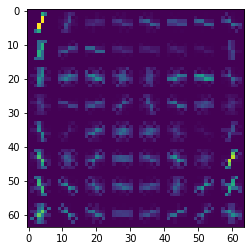

In [146]:
plt.imshow(vis_smile)

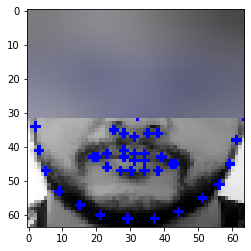

In [159]:
img_smile = cv2.cvtColor(img_smile, cv2.COLOR_BGR2RGB)
for (sX, sY) in shape_smile:
    cv2.circle(img_smile, (sX, sY), 1, (0, 0, 255), -1)
blurred_img = cv2.GaussianBlur(img_smile, (49, 49), 0)

mask = np.zeros((64, 64, 3), dtype=np.uint8)
mask = cv2.rectangle(mask, (0, 32), (64,64), (255,255,255), -1)

out = np.where(mask==np.array([255, 255, 255]), img_smile, blurred_img)

plt.imshow(out)

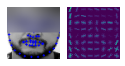

In [161]:
fig = plt.figure(figsize=(2., 2.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [out, vis_smile]):
    # Iterating over the grid returns the Axes.
    # if (im == img_smile).all(): ax.imshow(im)
    ax.imshow(im)
    ax.set_axis_off()
plt.axis('off')
# plt.show()
plt.savefig("test.png", bbox_inches='tight')

In [69]:
img_smile.shape

(85, 64, 3)